#Others

In [ ]:
data = pd.read_csv('K-Stat.csv')
data.head()

,filename,spec_cent,Spec_rolloff,Chroma_d,rmse,zcr,Pitch,Tempo,Mean,Std,...,delta2_mfcc12,delta2_mfcc13,delta2_mfcc14,delta2_mfcc15,delta2_mfcc16,delta2_mfcc17,delta2_mfcc18,delta2_mfcc19,delta2_mfcc20,label
0,13.wav,2186.712460,4415.374959,0.351923,0.041191,0.108183,26.255297,0.208744,249.974396,269.009599,...,0.000233,0.000665,0.000885,-0.000137,0.000068,0.000944,0.000328,0.000646,-0.000231,Hate
1,14.wav,1482.859986,2721.701598,0.300136,0.171379,0.069755,15.603372,0.139794,288.041801,212.199902,...,0.000296,-0.000479,0.000128,0.000925,0.000077,0.000360,0.000892,-0.000058,0.000017,Hate
2,20.wav,2066.626278,4047.230022,0.348844,0.147516,0.099057,31.641932,0.150048,246.595777,252.235972,...,0.000891,-0.001316,0.000256,0.000043,-0.000823,-0.000310,-0.000517,0.000617,0.000145,Hate
3,26.wav,2491.817423,5047.250730,0.347636,0.078662,0.117275,25.690022,0.169977,249.721512,270.394273,...,0.000047,0.000215,-0.000204,0.000284,-0.000033,-0.000300,0.000139,-0.000078,-0.000443,Hate
4,17.wav,1982.613202,3834.886811,0.358997,0.120765,0.098587,35.350578,0.165198,243.879264,252.813489,...,-0.000456,0.000650,0.000584,-0.000102,0.000116,-0.000046,0.000161,0.000056,-0.000076,Hate


In [ ]:
data = data.drop(['filename'], axis=1)
data.head()

,spec_cent,Spec_rolloff,Chroma_d,rmse,zcr,Pitch,Tempo,Mean,Std,Variance,...,delta2_mfcc12,delta2_mfcc13,delta2_mfcc14,delta2_mfcc15,delta2_mfcc16,delta2_mfcc17,delta2_mfcc18,delta2_mfcc19,delta2_mfcc20,label
0,2186.712460,4415.374959,0.351923,0.041191,0.108183,26.255297,0.208744,249.974396,269.009599,72366.164613,...,0.000233,0.000665,0.000885,-0.000137,0.000068,0.000944,0.000328,0.000646,-0.000231,Hate
1,1482.859986,2721.701598,0.300136,0.171379,0.069755,15.603372,0.139794,288.041801,212.199902,45028.798593,...,0.000296,-0.000479,0.000128,0.000925,0.000077,0.000360,0.000892,-0.000058,0.000017,Hate
2,2066.626278,4047.230022,0.348844,0.147516,0.099057,31.641932,0.150048,246.595777,252.235972,63622.985503,...,0.000891,-0.001316,0.000256,0.000043,-0.000823,-0.000310,-0.000517,0.000617,0.000145,Hate
3,2491.817423,5047.250730,0.347636,0.078662,0.117275,25.690022,0.169977,249.721512,270.394273,73113.062819,...,0.000047,0.000215,-0.000204,0.000284,-0.000033,-0.000300,0.000139,-0.000078,-0.000443,Hate
4,1982.613202,3834.886811,0.358997,0.120765,0.098587,35.350578,0.165198,243.879264,252.813489,63914.660278,...,-0.000456,0.000650,0.000584,-0.000102,0.000116,-0.000046,0.000161,0.000056,-0.000076,Hate


In [ ]:
### Check whether the dataset is imbalanced

data['label'].value_counts()

Normal    40
Hate      33
Name: label, dtype: int64

In [ ]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
scaler = StandardScaler()
X =  scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [ ]:
# split the dataset 
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = rng)

In [ ]:
data2 = pd.read_csv('data2.csv')
data2.head()

In [ ]:
data2 = data2.drop(['filename'],axis=1)
data2.head()

In [ ]:
genre_list = data2.iloc[:, -1]
encoder = LabelEncoder()
y_unseen = encoder.fit_transform(genre_list)
print(y_unseen)

In [ ]:
scaler = StandardScaler()
X_unseen = scaler.fit_transform(np.array(data2.iloc[:, :-1], dtype = float))
print(X_unseen)
print(X_unseen.shape)

In [ ]:
# split the dataset 
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = rng)

In [ ]:
### store the preprocessed data for use in the next notebook

%store X_train 
%store X_test 
%store y_train 
%store y_test 
%store y
#%store le

Stored 'X_train' (ndarray)
Stored 'X_test' (ndarray)
Stored 'y_train' (ndarray)
Stored 'y_test' (ndarray)
Stored 'y' (ndarray)


#Machine learning models

In [ ]:
# Function to plot the confusion matrix 
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

##1). Support Vector Machine Model

In [ ]:
from sklearn.svm import SVC

accuracy_scores = []
auc_scores = []

sv = svm.SVC(probability = True, kernel='rbf')
cv = KFold(n_splits=5, shuffle = True)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    sv.fit(X_train, y_train)
    accuracy_scores.append(sv.score(X_test, y_test))
    probs = sv.predict(X_test)  # model prediction process over test set
    # print(probs.shape)
    # probs = probs[:, 0]
    try:
        auc = roc_auc_score(y_test, probs)
        auc_scores.append(auc)
    except ValueError:
        pass


Train Index:  [ 0  1  2  3  5  6  7  8  9 12 13 14 15 17 18 19 21 22 23 24 25 26 27 28
 29 30 31 32 33 35 37 38 39 40 41 42 44 45 46 47 50 51 52 53 54 55 56 57
 58 60 61 62 64 66 67 69 70 72] 

Test Index:  [ 4 10 11 16 20 34 36 43 48 49 59 63 65 68 71]
Train Index:  [ 1  2  3  4  6  7  9 10 11 12 13 15 16 17 18 19 20 22 24 25 26 28 29 32
 33 34 35 36 37 38 40 42 43 45 46 47 48 49 51 52 53 54 56 57 58 59 60 61
 63 64 65 66 67 68 69 70 71 72] 

Test Index:  [ 0  5  8 14 21 23 27 30 31 39 41 44 50 55 62]
Train Index:  [ 0  1  2  3  4  5  6  7  8 10 11 13 14 15 16 17 18 19 20 21 22 23 25 26
 27 30 31 32 34 35 36 37 38 39 40 41 42 43 44 45 47 48 49 50 54 55 56 59
 61 62 63 64 65 66 68 69 70 71] 

Test Index:  [ 9 12 24 28 29 33 46 51 52 53 57 58 60 67 72]
Train Index:  [ 0  1  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 23 24 25 26 27
 28 29 30 31 33 34 35 36 37 39 41 43 44 46 48 49 50 51 52 53 55 56 57 58
 59 60 62 63 64 65 66 67 68 71 72] 

Test Index:  [ 2  3 15 22 32 38 40 42 45 

In [ ]:
print(np.mean(accuracy_scores))
print(np.mean(auc_scores))

0.8209523809523809
0.8588888888888888


Confusion matrix, without normalization


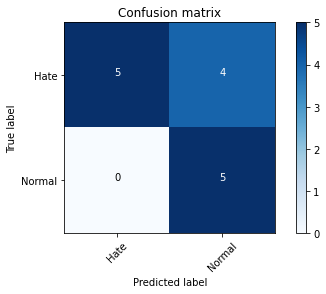

In [ ]:
cm = metrics.confusion_matrix(y_test, probs)
plot_confusion_matrix(cm, classes=['Hate', 'Normal'])

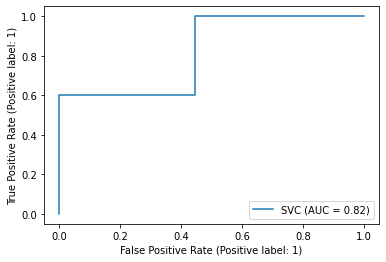

In [ ]:
svm_disp = RocCurveDisplay.from_estimator(sv, X_test, y_test)
plt.show()


##2). Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

accuracy_scores = []
auc_scores = []

rf = RandomForestClassifier(n_jobs = 2)
#rf = RandomForestClassifier(n_jobs = 2, n_estimators = 1000, criterion ='entropy', warm_start = True, max_features = 'sqrt', oob_score = 'True',) #max_depth=5, n_estimators=10, max_features=1)
cv = KFold(n_splits=5 , random_state = rng, shuffle = True)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    rf.fit(X_train, y_train)      #Train the model
    accuracy_scores.append(rf.score(X_test, y_test))   #Make predictions
    probs = rf.predict(X_test)  # model prediction process over test set

    #print(probs.shape)
    # probs = probs[:, 0]
    
    try:
        auc = roc_auc_score(y_test, probs)
        auc_scores.append(auc)
    except ValueError:
        pass

Train Index:  [ 0  1  4  5  6  7  8  9 11 12 13 14 15 17 18 19 21 22 23 25 27 28 29 30
 31 32 34 35 36 37 38 39 40 41 42 43 45 46 48 49 50 52 53 54 55 56 57 58
 60 61 63 64 65 66 67 69 71 72] 

Test Index:  [ 2  3 10 16 20 24 26 33 44 47 51 59 62 68 70]
Train Index:  [ 1  2  3  4  5  6  7  8  9 10 11 14 15 16 17 20 21 22 23 24 25 26 27 28
 29 31 32 33 34 36 39 40 41 42 44 45 46 47 49 50 51 52 54 56 58 59 60 61
 62 63 64 65 66 67 68 70 71 72] 

Test Index:  [ 0 12 13 18 19 30 35 37 38 43 48 53 55 57 69]
Train Index:  [ 0  1  2  3  7 10 12 13 14 15 16 17 18 19 20 24 25 26 27 28 30 31 32 33
 34 35 37 38 39 40 41 43 44 45 46 47 48 50 51 52 53 54 55 56 57 59 61 62
 63 64 65 66 67 68 69 70 71 72] 

Test Index:  [ 4  5  6  8  9 11 21 22 23 29 36 42 49 58 60]
Train Index:  [ 0  2  3  4  5  6  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 26 27
 29 30 31 33 34 35 36 37 38 41 42 43 44 45 47 48 49 51 52 53 54 55 57 58
 59 60 62 63 64 66 68 69 70 71 72] 

Test Index:  [ 1  7 17 25 28 32 39 40 46 

In [ ]:
print(np.mean(accuracy_scores))
print(np.mean(auc_scores))

0.9019047619047619
0.8991666666666667


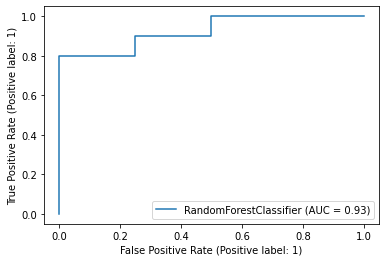

In [ ]:
rf_disp = RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.show()

Confusion matrix, without normalization


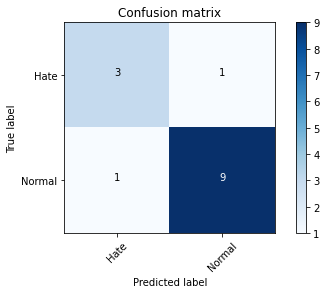

In [ ]:
cm = metrics.confusion_matrix(y_test, probs)
plot_confusion_matrix(cm, classes=['Hate', 'Normal'])

##3). Extreme Gradient Boosting

In [ ]:
from xgboost import XGBClassifier

accuracy_scores = []
auc_scores = []

gb = XGBClassifier()
cv = KFold(n_splits=5 , random_state = rng, shuffle = True)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    gb.fit(X_train, y_train)      #Train the model
    accuracy_scores.append(gb.score(X_test, y_test))   #Make predictions
    probs = gb.predict(X_test)  # model prediction process over test set

    #print(probs.shape)
    # probs = probs[:, 0]
    
    try:
        auc = roc_auc_score(y_test, probs)
        auc_scores.append(auc)
    except ValueError:
        pass

#checkpointer = ModelCheckpoint(filepath='saved_models/svm.hdf5', verbose=1, save_best_only=True)

Train Index:  [ 0  1  2  3  4  5  6  7  9 10 12 14 15 16 17 18 19 21 22 23 24 25 27 28
 29 30 31 32 35 36 37 38 39 41 42 45 46 47 49 50 51 52 53 54 55 56 58 59
 60 62 64 65 66 67 68 70 71 72] 

Test Index:  [ 8 11 13 20 26 33 34 40 43 44 48 57 61 63 69]
Train Index:  [ 1  2  3  4  5  7  8  9 10 11 13 14 16 17 18 19 20 21 22 25 26 27 29 30
 31 32 33 34 37 39 40 41 42 43 44 45 46 47 48 49 50 51 53 54 56 57 58 59
 60 61 62 63 64 65 68 69 71 72] 

Test Index:  [ 0  6 12 15 23 24 28 35 36 38 52 55 66 67 70]
Train Index:  [ 0  1  2  5  6  7  8  9 11 12 13 14 15 19 20 21 23 24 25 26 27 28 29 31
 32 33 34 35 36 37 38 40 42 43 44 45 48 49 50 51 52 54 55 56 57 58 60 61
 62 63 65 66 67 68 69 70 71 72] 

Test Index:  [ 3  4 10 16 17 18 22 30 39 41 46 47 53 59 64]
Train Index:  [ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 22 23 24 26 28 30
 32 33 34 35 36 37 38 39 40 41 42 43 44 46 47 48 49 51 52 53 55 56 57 58
 59 61 62 63 64 66 67 69 70 71 72] 

Test Index:  [ 1  2 14 21 25 27 29 31 45 

In [ ]:
print(np.mean(accuracy_scores))
print(np.mean(auc_scores))

0.8876190476190476
0.8918253968253967


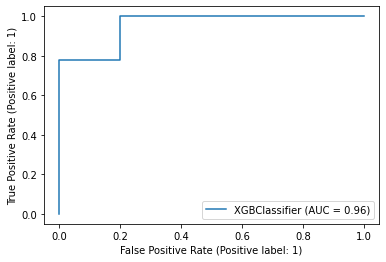

In [ ]:
gb_disp = RocCurveDisplay.from_estimator(gb, X_test, y_test)
plt.show()

Confusion matrix, without normalization


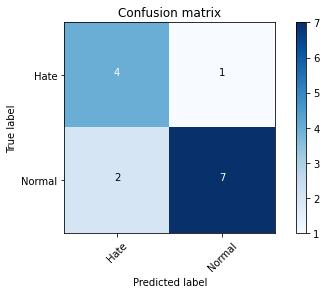

In [ ]:
cm = metrics.confusion_matrix(y_test, probs)
plot_confusion_matrix(cm, classes=['Hate', 'Normal'])

##4). Multi-Layer Perceptron Model (MLP)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 

# Initialize the Multi Layer Perceptron Classifier

Model = MLPClassifier(activation = "relu", solver = "adam", hidden_layer_sizes=(512,256,128,32), random_state=rng, verbose=1, max_iter = 35, tol = 0.0001)

In [ ]:
Model.fit(X_train,y_train)

Iteration 1, loss = 0.73099348
Iteration 2, loss = 0.57362502
Iteration 3, loss = 0.47012133
Iteration 4, loss = 0.37636602
Iteration 5, loss = 0.29120007
Iteration 6, loss = 0.21685604
Iteration 7, loss = 0.15407011
Iteration 8, loss = 0.10423848
Iteration 9, loss = 0.06761447
Iteration 10, loss = 0.04260284
Iteration 11, loss = 0.02644614
Iteration 12, loss = 0.01617832
Iteration 13, loss = 0.00985463
Iteration 14, loss = 0.00604359
Iteration 15, loss = 0.00380735
Iteration 16, loss = 0.00251734
Iteration 17, loss = 0.00176556
Iteration 18, loss = 0.00132593
Iteration 19, loss = 0.00106777
Iteration 20, loss = 0.00090920
Iteration 21, loss = 0.00081350
Iteration 22, loss = 0.00075230
Iteration 23, loss = 0.00071227
Iteration 24, loss = 0.00068560
Iteration 25, loss = 0.00066735
Iteration 26, loss = 0.00065468
Iteration 27, loss = 0.00064573
Iteration 28, loss = 0.00063934
Iteration 29, loss = 0.00063468
Iteration 30, loss = 0.00063122
Iteration 31, loss = 0.00062862
Training loss did

MLPClassifier(hidden_layer_sizes=(512, 256, 128, 32), max_iter=35,
              random_state=RandomState(MT19937) at 0x7F6E5E6EF8D0, verbose=1)

In [ ]:
# Predict for the test set
y_pred = Model.predict(X_test)

# Calculate the accuracy of our model
accuracy=accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Print the accuracy and AUC
print("Accuracy: {:.2f}%".format(accuracy*100))
print("Auc: {:.2f}%".format(auc*100))

Accuracy: 86.67%
Auc: 85.71%


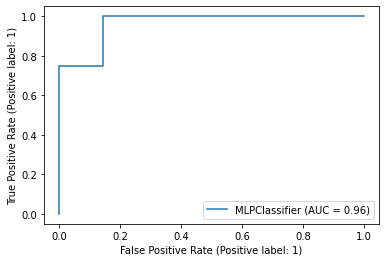

In [ ]:
Model_disp = RocCurveDisplay.from_estimator(Model, X_test, y_test)
plt.show()

Confusion matrix, without normalization


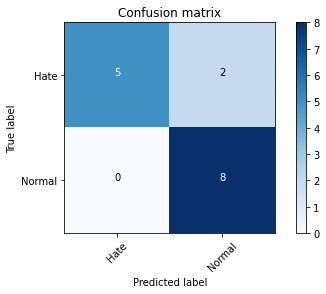

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Hate', 'Normal'])

Comparing the classifiers AUC values

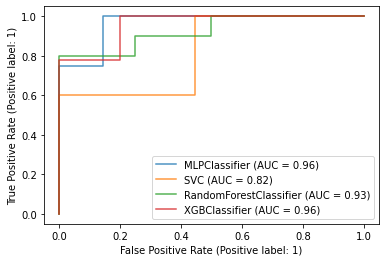

In [ ]:
ax = plt.gca()
Model_disp = RocCurveDisplay.from_estimator(Model, X_test, y_test, ax=ax, alpha=0.8)
svm_disp.plot(ax=ax, alpha=0.8)
rf_disp.plot(ax=ax, alpha=0.8)
gb_disp.plot(ax=ax, alpha=0.8)
plt.show()